In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df_train = pd.read_csv('/data/home/alexey.astafiev/lab04/laba04_train.csv')

In [3]:
df_train.head()

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,333149,479990,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,303639,450480,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,327113,473954,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,384197,531038,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,202462,349303,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [4]:
df_train[df_train['TARGET']==1]

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
8,169965,316806,3,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
12,313331,460172,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
13,423509,570350,0,0.000000,0.0,77.0,0.0,0.0,0.0,NaN,...,0.0000,0.0,0.226190,0.226190,0.0,0.0,0.000000,0.000000,0.000000,1
14,300824,447665,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
20,114902,261743,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
23,183178,330019,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
41,163442,310283,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
55,119915,266756,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
76,293079,439920,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
78,386353,533194,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1


In [3]:
y = df_train['TARGET']

In [6]:
y.shape

(399589,)

In [4]:
cols = df_train.columns.values.tolist()

In [5]:
del cols[0]

In [6]:
del cols[len(cols)-1]


In [7]:
trainX = df_train[cols]

In [8]:
fix_trainX = trainX.drop(['CNT_ACCEPTS_MTP', 'CNT_ACCEPTS_TK', 'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_MTP', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK', 'PRC_ACCEPTS_MTP', 'PRC_ACCEPTS_TK'], axis=1)

In [9]:
fix_trainX = fix_trainX.drop(['CLNT_JOB_POSITION'], axis=1)

In [10]:
fix_trainX[['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE']] = fix_trainX[['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE']].fillna('none')

In [11]:
def union_cols(x):
    if x[0] == 'none':
        if x[1] == 'none':
            return 'none'
        else:
            return x[1]
    elif x[0] == x[1]:
        return x[0]
    else:
        return x[0]
        

In [12]:
fix_trainX['CLNT_JOB_TYPE'] = fix_trainX[['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE']].apply(union_cols, axis=1)

In [13]:
fix_trainX = fix_trainX.drop(['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE'], axis=1)


In [14]:
fix_trainX['CLNT_TRUST_RELATION'] = fix_trainX[['CLNT_TRUST_RELATION']].fillna('none')

In [15]:
def f1(x):
#     if x[0] == 'none':
#         return 'OTHER'
#     elif unicode(x[0]) == u'Мать':
    if x[0].decode('utf-8') == u'Мать':
        return 'MOTHER'
    elif x[0].decode('utf-8') == u'Друг':
        return 'FRIEND'
    elif x[0].decode('utf-8') == u'Отец':
        return 'FATHER'
    elif x[0].decode('utf-8') == u'Брат':
        return 'BROTHER'
    elif x[0].decode('utf-8') == u'Близкий ро':
        return 'RELATIVE'
    elif x[0].decode('utf-8') == u'Сестра':
        return 'SISTER'
    elif x[0].decode('utf-8') == u'Дальний ро':
        return 'RELATIVE'
    elif x[0].decode('utf-8') == u'Сын':
        return 'SON'
    elif x[0].decode('utf-8') == u'Дочь':
        return 'DAUGHTER'
    elif x[0].decode('utf-8') == u'Жена':
        return 'WIFE'
    elif x[0].decode('utf-8') == u'Муж':
        return 'HUSBAND'
    elif x[0].decode('utf-8') == u'мать':
        return 'MOTHER'
    elif x[0].decode('utf-8') == u'мама':
        return 'MOTHER'
    else:
        return x[0]


In [16]:
fix_trainX['CLNT_TRUST_RELATION1'] = fix_trainX[['CLNT_TRUST_RELATION']].apply(f1, axis=1)

In [17]:
fix_trainX = fix_trainX.drop(['CLNT_TRUST_RELATION'], axis=1)

In [21]:
# pickle.dump(fix_trainX, open('/data/home/alexey.astafiev/lab04/fix_trainX.pcl', 'w'))

In [18]:
for i in fix_trainX.columns.values:
    if fix_trainX[i].dtype == 'object':
        fix_trainX[i] = fix_trainX[i].fillna('none')
#         print '%s\t%s' % (i, fix_trainX[i].dtype)
    

In [19]:
def f2(x):
    if x[0] == 'v':
        return 'V'
    elif x[0] == 'm':
        return 'M'
    elif x[0] == 't':
        return 'T'
    elif x[0] == 'd':
        return 'D'
    elif x[0] == 'w':
        return 'W'
    else:
        return x[0]



In [20]:
fix_trainX['APP_MARITAL_STATUS'] = fix_trainX[['APP_MARITAL_STATUS']].apply(f2, axis=1)

In [21]:
for i in fix_trainX.columns.values:
    if fix_trainX[i].dtype == 'int64':
        fix_trainX[i] = fix_trainX[i].fillna(0)
    elif fix_trainX[i].dtype == 'float64':
        fix_trainX[i] = fix_trainX[i].fillna(0.0)

In [22]:
fix_trainX.shape

(399589, 103)

In [23]:
fix_trainX = fix_trainX.drop(['ID'], axis=1)

In [28]:
fix_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399589 entries, 0 to 399588
Columns: 102 entries, CR_PROD_CNT_IL to CLNT_TRUST_RELATION1
dtypes: float64(84), int64(7), object(11)
memory usage: 311.0+ MB


In [24]:
categ_cols = []
for i in fix_trainX.columns.values:
    if fix_trainX[i].dtype == 'object':
        categ_cols.append(i)

In [30]:
print categ_cols

['APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_EMP_TYPE', 'APP_COMP_TYPE', 'PACK', 'CLNT_JOB_TYPE', 'CLNT_TRUST_RELATION1']


In [25]:
X = pd.get_dummies(fix_trainX, columns=categ_cols)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score = True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
y_test

185770    0
306106    0
349252    0
277156    0
166524    0
149748    0
153568    0
336050    0
78691     0
10394     0
136922    0
73203     0
303865    0
281081    0
658       0
266544    0
386245    0
99065     0
40760     0
90333     1
60140     0
276584    0
30176     0
376959    0
293571    0
392114    0
136420    0
5345      0
192269    0
396357    0
         ..
180584    0
46112     0
228071    0
346358    0
199126    0
205313    0
362368    0
99016     0
163377    0
380854    0
343819    1
258844    0
197357    0
27779     0
165989    0
256298    1
72356     0
216087    0
151285    0
353165    0
65201     0
117372    0
307388    1
282674    0
359981    0
40812     0
91544     0
139904    0
145226    0
163884    0
Name: TARGET, dtype: int64

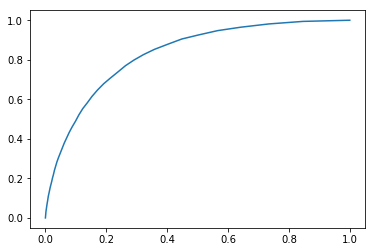

In [35]:
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
plt.plot(fpr, tpr)

In [36]:
roc_auc_score(y_test, predictions[:, 1])

0.82951784791251748

In [37]:
# Real classification
df_test = pd.read_csv('/data/home/alexey.astafiev/lab04/laba04_test.csv')

In [38]:
# Real classification
y_test = df_train['ID']

In [39]:
# Real classification
cols = df_test.columns.values.tolist()
del cols[0]
testX = df_test[cols]
fix_testX = testX.drop(['CNT_ACCEPTS_MTP', 'CNT_ACCEPTS_TK', 'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_MTP', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK', 'PRC_ACCEPTS_MTP', 'PRC_ACCEPTS_TK'], axis=1)
fix_testX = fix_testX.drop(['CLNT_JOB_POSITION'], axis=1)
fix_testX[['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE']] = fix_testX[['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE']].fillna('none')
fix_testX['CLNT_JOB_TYPE'] = fix_testX[['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE']].apply(union_cols, axis=1)
fix_testX = fix_testX.drop(['CLNT_JOB_POSITION_TYPE', 'APP_POSITION_TYPE'], axis=1)
fix_testX['CLNT_TRUST_RELATION'] = fix_testX[['CLNT_TRUST_RELATION']].fillna('none')
fix_testX['CLNT_TRUST_RELATION1'] = fix_testX[['CLNT_TRUST_RELATION']].apply(f1, axis=1)
fix_testX = fix_testX.drop(['CLNT_TRUST_RELATION'], axis=1)

for i in fix_testX.columns.values:
    if fix_testX[i].dtype == 'object':
        fix_testX[i] = fix_testX[i].fillna('none')

fix_testX['APP_MARITAL_STATUS'] = fix_testX[['APP_MARITAL_STATUS']].apply(f2, axis=1)

for i in fix_testX.columns.values:
    if fix_testX[i].dtype == 'int64':
        fix_testX[i] = fix_testX[i].fillna(0)
    elif fix_testX[i].dtype == 'float64':
        fix_testX[i] = fix_testX[i].fillna(0.0)

fix_testX = fix_testX.drop(['ID'], axis=1)

categ_cols = []
for i in fix_testX.columns.values:
    if fix_testX[i].dtype == 'object':
        categ_cols.append(i)



X_test = pd.get_dummies(fix_testX, columns=categ_cols)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399589 entries, 0 to 399588
Columns: 172 entries, CR_PROD_CNT_IL to CLNT_TRUST_RELATION1_none
dtypes: float64(165), int64(7)
memory usage: 524.4 MB


In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44399 entries, 0 to 44398
Columns: 167 entries, CR_PROD_CNT_IL to CLNT_TRUST_RELATION1_none
dtypes: float64(160), int64(7)
memory usage: 56.6 MB


In [42]:
# Real classification
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score = True)
# model.fit_transform(X,y)
model.fit(X, y)

predictions = model.predict_proba(X_test)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: Number of features of the model must  match the input. Model n_features is 172 and  input n_features is 167 

In [ ]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
plt.plot(fpr, tpr)

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

In [ ]:
# model = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score = True)
# X_train, X_test, y_train, y_test = train_test_split(fix_trainX_no_cat, y, test_size=0.3)

# param_grid = { 
#     'n_estimators': [200, 700]
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X, y)
# model.fit(X_train, y_train)
# predictions = model.predict_proba(X_test)

In [ ]:
# fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
# plt.plot(fpr, tpr)

In [ ]:
# roc_auc_score(y_test, predictions[:, 1])